# Análise dos dados coletados do Spotify
### Coleta realizada em: 

##### Trabalho de Conclusão de Curso - TCC


### Importação das bibliotecas e do arquivo 'dataframefinal.csv'

In [1]:
import pandas as pd
%matplotlib inline

In [17]:
# Função definida para normalizar os valores
from sklearn.preprocessing import StandardScaler
def normalizar(array):
    standarlization = StandardScaler()
    return standarlization.fit_transform(array)

In [19]:
# Função para retornar um gráfito do método Elbow, com a finalidade de identificar a quantidade ideal de clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def calculoElbow(array):
    wcss = []

    for i in range(1,10):
        kmeans = KMeans(n_clusters=i, init='random')
        kmeans.fit(array)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1,10),wcss)
    plt.title('O Metodo Elbow')
    plt.xlabel('numero de Clusters')
    plt.ylabel('WSS')
    plt.show()
    

In [23]:
# Leitura do arquivo
df = pd.read_csv('dataframefinal.csv')
# Remoção de colunas nao utilizadas para a análise
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', '_id', 'album', 'available_markets',
                      'disc_number','episode', 'uri', 'href', 'id', 'linked_from', 
                      'type', 'explicit','external_ids','external_urls','is_local', 'preview_url',
                     'track_number', 'track'])
# remoção de tuplas com valores NaN
df = df.dropna()
print('Tamanho do Dataframe: %d músicas' % len(df))

Tamanho do Dataframe: 42142 músicas


In [24]:
df.head()

,artists,category,country,duration_ms,name,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Jorge & Mateus,toplists,BR,175219,Tijolão - Ao Vivo,0,0.637,0.877,-3.680,0.1980,0.469,0.0,0.3430,0.691,118.889
1,Ed Sheeran,toplists,BR,206186,Cross Me (feat. Chance the Rapper & PnB Rock),0,0.746,0.787,-6.373,0.1200,0.214,0.0,0.0669,0.607,95.005
2,Paula Fernandes,toplists,BR,204000,Juntos,63,0.687,0.411,-8.619,0.0338,0.866,0.0,0.0967,0.184,101.851
3,Diego & Victor Hugo,toplists,BR,190276,Entregador de Flor - Ao Vivo em Brasília,0,0.376,0.834,-4.303,0.0800,0.549,0.0,0.4120,0.329,125.171
4,Dennis DJ,toplists,BR,224368,Megamix do Baile,0,0.847,0.847,-6.920,0.3530,0.475,0.0,0.1180,0.741,149.947


In [25]:
# Identificação da quantidade de músicas por país
df.country.value_counts()

BR    17928
FR    13040
JP    11174
Name: country, dtype: int64

##### Análise em relação a danceability

In [26]:
X = df.loc[ :, ["danceability"]].values
X

array([[0.637],
       [0.746],
       [0.687],
       ...,
       [0.789],
       [0.272],
       [0.616]])

In [27]:
# Normalização da danceability
Xst = normalizar(X)
Xst

array([[ 0.23821444],
       [ 0.86320151],
       [ 0.52490576],
       ...,
       [ 1.10975605],
       [-1.85463217],
       [ 0.11780409]])

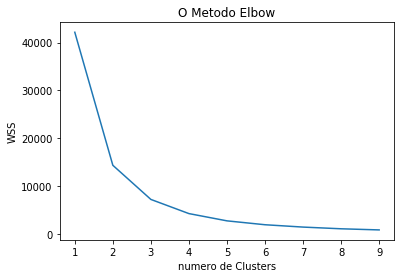

In [28]:
calculoElbow(Xst)